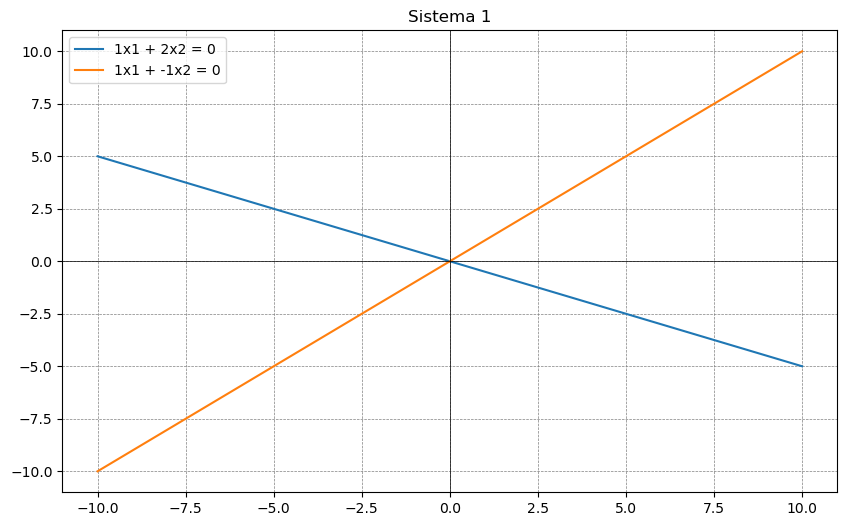

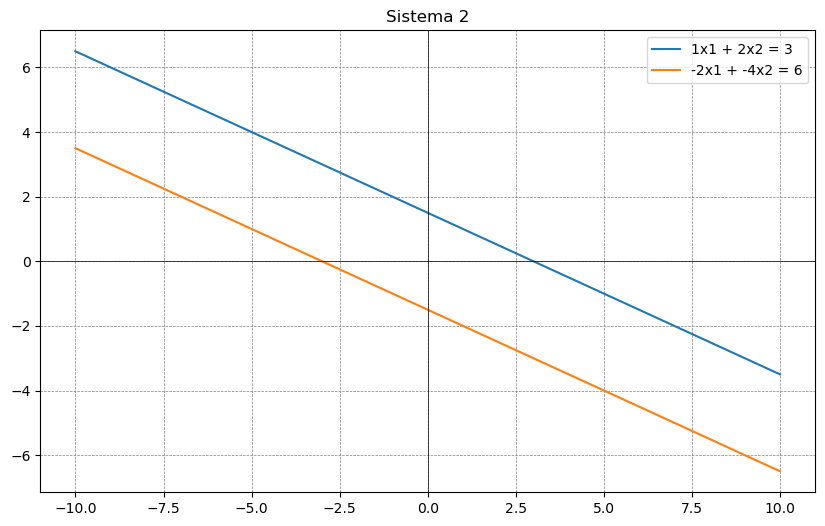

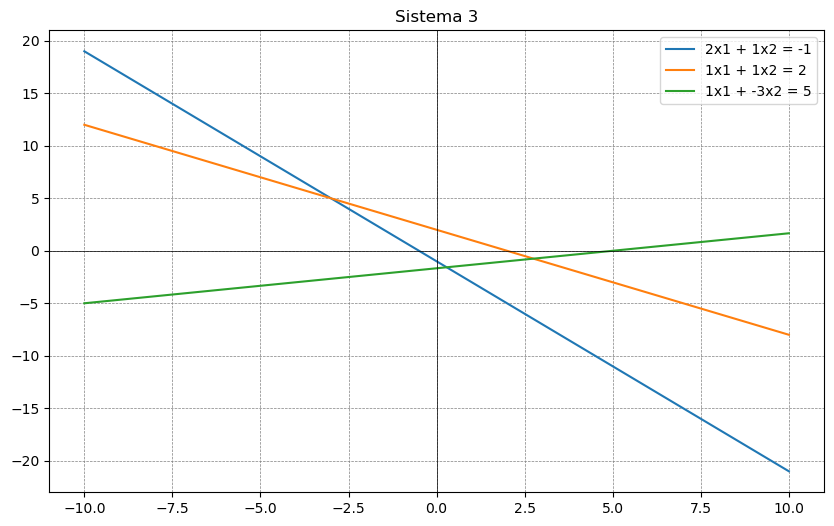

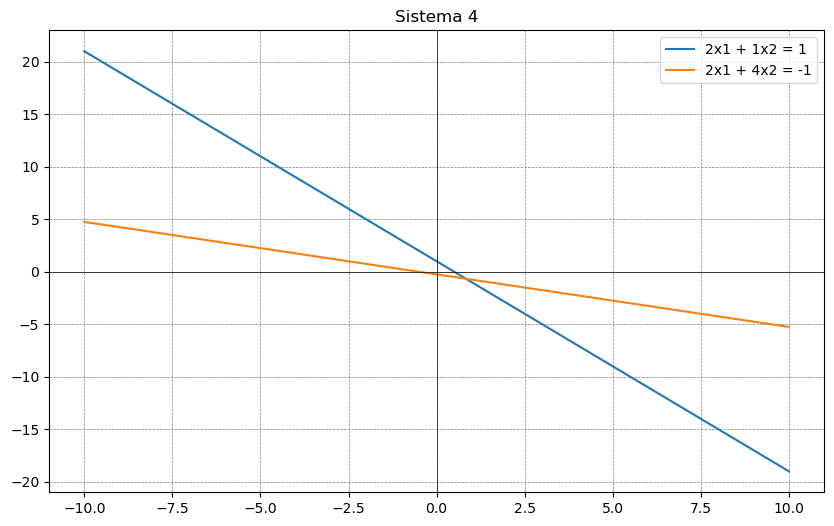

In [1]:
#Ejercicio 1 Solución de métodos gráficos
import numpy as np
import matplotlib.pyplot as plt

def plot_system(equations, title):
    x = np.linspace(-10, 10, 400)
    plt.figure(figsize=(10, 6))
    
    for eq in equations:
        y = (eq[2] - eq[0]*x) / eq[1]
        plt.plot(x, y, label=f'{eq[0]}x1 + {eq[1]}x2 = {eq[2]}')

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.title(title)
    plt.legend()
    plt.show()

# Definición de los sistemas de ecuaciones
systems = [
    ([1, 2, 0], [1, -1, 0]),
    ([1, 2, 3], [-2, -4, 6]),
    ([2, 1, -1], [1, 1, 2], [1, -3, 5]),
    ([2, 1, 1, 1], [2, 4, -1, -1])
]

# Graficar cada sistema
for i, system in enumerate(systems):
    plot_system(system, f'Sistema {i+1}')


In [3]:
#Ejercicio 2 Eliminación guassiana con sustitución hacia atrás
import numpy as np

def gaussian_elimination(A, b):
    n = len(b)
    
    # Eliminación hacia adelante
    for i in range(n):
        for j in range(i+1, n):
            ratio = A[j][i] / A[i][i]
            for k in range(n):
                A[j][k] -= ratio * A[i][k]
            b[j] -= ratio * b[i]
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1][n-1]
    
    for i in range(n-2, -1, -1):
        x[i] = b[i]
        for j in range(i+1, n):
            x[i] -= A[i][j] * x[j]
        x[i] /= A[i][i]
    
    return np.round(x, 2)

# Definición de los sistemas de ecuaciones
systems = [
    (np.array([[-1, 4, 1], [5/3, 2/3, 2/3], [2, 1, 4]]), np.array([8, 1, 11])),
    (np.array([[4, 2, -1], [1/9, 1/9, -1/3], [1, 4, 2]]), np.array([-5, -1, 9]))
]

# Resolver cada sistema
solutions = [gaussian_elimination(A, b) for A, b in systems]
for i, sol in enumerate(solutions):
    print(f'Sistema {i+1}: {sol}')


Sistema 1: [-1.15  1.    2.87]
Sistema 2: [-2.41  2.56  0.47]


In [13]:
#Ejercicio 3 Eliminación gaussiana con intercambio de filas
import numpy as np

def gaussian_elimination_with_pivoting(A, b):
    n = len(b)
    A = A.astype(float)
    b = b.astype(float)
    
    for i in range(n):
        # Encontrar la fila con el mayor elemento en la columna actual
        max_row = np.argmax(np.abs(A[i:, i])) + i
        # Intercambiar las filas
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]
        
        # Check for zero pivot element
        if A[i, i] == 0:
            raise ValueError("La matriz es singular y no se puede resolver mediante eliminación gaussiana.")
        
        for j in range(i+1, n):
            ratio = A[j][i] / A[i][i]
            A[j, i:] -= ratio * A[i, i:]
            b[j] -= ratio * b[i]
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    return x

# Definición de los sistemas de ecuaciones
systems = [
    (np.array([[1, -1, 3], [3, -3, 1], [1, 1, 0]]), np.array([2, -1, 3])),
    (np.array([[2, -1.5, 3], [-1, 0, 2], [4, -4.5, 5]]), np.array([1, 3, 1])),
    (np.array([[2, 0, 0, 0], [1, 1.5, 0, 0], [0, -3, 0.5, 0], [2, -2, 1, 1]]), np.array([3, 4.5, -6.6, 0.8])),
    (np.array([[1, 1, 0, 1], [2, 1, -1, 1], [4, -1, -2, 2], [3, -1, -1, 2]]), np.array([2, 1, 0, -3]))
]

# Resolver cada sistema
solutions = []
for i, (A, b) in enumerate(systems):
    try:
        sol = gaussian_elimination_with_pivoting(A, b)
        solutions.append(sol)
        print(f'Sistema {i+1}: {sol}')
    except ValueError as e:
        solutions.append(None)
        print(f'Sistema {i+1}: {e}')





Sistema 1: [1.1875 1.8125 0.875 ]
Sistema 2: [-1. -0.  1.]
Sistema 3: [ 1.5  2.  -1.2  3. ]
Sistema 4: La matriz es singular y no se puede resolver mediante eliminación gaussiana.


In [6]:
#Ejercico 4 Eliminación Gaussiana con precisión de 32 bits
def gaussian_elimination_32bit(A, b):
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    return gaussian_elimination_with_pivoting(A, b)

# Definición de los sistemas de ecuaciones
systems = [
    (np.array([[1/4, 1/5, 1/6], [1/3, 1/4, 1/5], [1/2, 1, 2]], dtype=np.float32), np.array([9, 8, 8], dtype=np.float32)),
    (np.array([[3.333, 15920, -10.333], [2.222, 16.71, 9.612], [1.5611, 5.1791, 1.6852]], dtype=np.float32), np.array([15913, 28.544, 8.4254], dtype=np.float32)),
    (np.array([[1, 1/2, 1/3, 1/4], [1/2, 1/3, 1/4, 1/5], [1/3, 1/4, 1/5, 1/6], [1/4, 1/5, 1/6, 1/7]], dtype=np.float32), np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)),
    (np.array([[2, 1, -1, 1, -3], [1, 0, 2, -1, 1], [0, -2, -1, 1, -5], [3, 1, -4, 0, 5], [1, -1, -1, -1, 1]], dtype=np.float32), np.array([7, 2, -5, 6, -3], dtype=np.float32))
]

# Resolver cada sistema
solutions = [gaussian_elimination_32bit(A, b) for A, b in systems]
for i, sol in enumerate(solutions):
    print(f'Sistema {i+1}: {sol}')


Sistema 1: [-227.07669834  476.92267099 -177.69216091]
Sistema 2: [0.99999962 1.         1.00000021]
Sistema 3: [-0.03174521  0.59523101 -2.38093701  2.77776827]
Sistema 4: [1.96396396 2.59459459 0.8018018  1.71171171 0.14414414]


In [7]:
#Ejercicio 5 Sistemas lineales con parámetro 
def analyze_system_with_alpha():
    from sympy import symbols, Eq, solve

    alpha = symbols('alpha')
    x1, x2, x3 = symbols('x1 x2 x3')

    equations = [
        Eq(x1 - x2 + alpha * x3, -2),
        Eq(-x1 + 2 * x2 - alpha * x3, 3),
        Eq(alpha * x1 + x2 + x3, 2)
    ]

    sol = solve(equations, (x1, x2, x3, alpha), dict=True)
    alpha_values = [s[alpha] for s in sol]
    
    for val in alpha_values:
        if val != alpha:
            print(f"Para α = {val}, el sistema tiene solución.")
        else:
            print("Para valores de α distintos a los encontrados, el sistema no tiene solución.")

analyze_system_with_alpha()


Para α = -1, el sistema tiene solución.
Para α = (x3 - 1)/x3, el sistema tiene solución.


In [11]:
#Ejercicio 6 Sistema biologico y de especies
def system_of_species():
    A = np.array([
        [1, 2, 0, 3],
        [1, 0, 2, 2],
        [0, 0, 1, 1]
    ])
    x = np.array([1000, 500, 350, 400])
    b = np.array([3500, 2700, 900])

    # Verificar si hay suficiente alimento
    suficiente_alimento = np.all(np.dot(A, x) <= b)
    print(f"¿Hay suficiente alimento? {'Sí' if suficiente_alimento else 'No'}")
    
    # Número máximo de animales que se podría agregar
    incrementos_maximos = b - np.dot(A, x)
    print(f"Incrementos máximos posibles: {incrementos_maximos}")

    # Incrementos si la especie 1 se extingue
    A_ext1 = A[:, 1:]
    incrementos_ext1 = b - np.dot(A_ext1, x[1:])
    print(f"Incrementos posibles si la especie 1 se extingue: {incrementos_ext1}")

    # Incrementos si la especie 2 se extingue
    A_ext2 = np.delete(A, 1, axis=1)
    incrementos_ext2 = b - np.dot(A_ext2, np.delete(x, 1))
    print(f"Incrementos posibles si la especie 2 se extingue: {incrementos_ext2}")

system_of_species()


¿Hay suficiente alimento? Sí
Incrementos máximos posibles: [300 200 150]
Incrementos posibles si la especie 1 se extingue: [1300 1200  150]
Incrementos posibles si la especie 2 se extingue: [1300  200  150]


In [12]:
#Ejercicio 7 Repetir el ejercicio 4 con Gauss Jordan
def gauss_jordan(A, b):
    n = len(b)
    A = A.astype(float)
    b = b.astype(float).reshape(-1, 1)
    augmented_matrix = np.hstack((A, b))
    
    for i in range(n):
        augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i, i]
        for j in range(n):
            if i != j:
                augmented_matrix[j] -= augmented_matrix[i] * augmented_matrix[j, i]
    
    return augmented_matrix[:, -1]

# Resolver cada sistema con Gauss-Jordan
solutions_gj = [gauss_jordan(A, b) for A, b in systems]
for i, sol in enumerate(solutions_gj):
    print(f'Sistema {i+1} (Gauss-Jordan): {sol}')


Sistema 1 (Gauss-Jordan): [-227.07669834  476.92267099 -177.69216091]
Sistema 2 (Gauss-Jordan): [0.99999962 1.         1.00000021]
Sistema 3 (Gauss-Jordan): [-0.03174521  0.59523101 -2.38093701  2.77776827]
Sistema 4 (Gauss-Jordan): [1.96396396 2.59459459 0.8018018  1.71171171 0.14414414]
